In [12]:
!pip install --upgrade tensorflow-hub

In [14]:
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [19]:
#read the test data
testdata = pd.read_csv(
    "sign_mnist_test.csv"
)
testdata.shape

(7172, 785)

In [20]:
#process the features
testFeatures = testdata.iloc[:, 1:785]
XT = testFeatures.to_numpy()
XT = XT.reshape(-1, 28, 28)

In [21]:
#process the labels
testLabels = testdata.iloc[:, 0]
testLabels.shape
YT = testLabels.to_numpy()

In [22]:
#read the training data
rawdata = pd.read_csv(
    "sign_mnist_train.csv",
    )
rawdata.shape


(27455, 785)

In [8]:
#process the features
trainFeatures = rawdata.iloc[:, 1:785]
X = trainFeatures.to_numpy()
X = X.reshape(-1, 28, 28)

In [9]:
#process the labels
trainLabels = rawdata.iloc[:, 0]
trainLabels.shape
Y = trainLabels.to_numpy()

In [ ]:
#assign names to the classes
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

#display some examples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y[i]])
plt.show()

In [1]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

classifier_model = mobilenet_v2

IMAGE_SHAPE = (224, 224)

classifer = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape = IMAGE_SHAPE + (3,))
])


NameError: name 'tf' is not defined

In [10]:
#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3,3), activation="relu", input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size= [2,2]),
    tf.keras.layers.Conv2D(10, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=[2,2]),
    tf.keras.layers.Conv2D(10, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=[2,2]),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(26, activation = "softmax")
])

#complile and fit the model
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X, Y, epochs = 10, batch_size= 1000)
model.evaluate(X,Y)

Epoch 1/10
28/28 [==============================] - 7s 205ms/step - loss: 5.7280 - accuracy: 0.0476
Epoch 2/10
28/28 [==============================] - 6s 204ms/step - loss: 3.0926 - accuracy: 0.0831
Epoch 3/10
28/28 [==============================] - 5s 193ms/step - loss: 2.8157 - accuracy: 0.1536
Epoch 4/10
28/28 [==============================] - 6s 206ms/step - loss: 2.2933 - accuracy: 0.2908
Epoch 5/10
28/28 [==============================] - 6s 201ms/step - loss: 1.7664 - accuracy: 0.4393
Epoch 6/10
28/28 [==============================] - 5s 196ms/step - loss: 1.4591 - accuracy: 0.5252
Epoch 7/10
28/28 [==============================] - 6s 200ms/step - loss: 1.2375 - accuracy: 0.5899
Epoch 8/10
28/28 [==============================] - 7s 235ms/step - loss: 1.0922 - accuracy: 0.6345
Epoch 9/10
28/28 [==============================] - 6s 222ms/step - loss: 0.9679 - accuracy: 0.6719
Epoch 10/10
858/858 [==============================] - 4s 4ms/step - loss: 0.8120 - accuracy: 0.7142

[0.8120364546775818, 0.7141504287719727]

In [79]:
#Evaluate the model
model.evaluate(XT,YT)
predictions = model.predict(XT)

225/225 [==============================] - 1s 3ms/step


In [ ]:
predictions[2502]
for i in range(26):
    
    print(class_names[i] + ": ")
    print(predictions[2502][i])

NameError: name 'class_names' is not defined

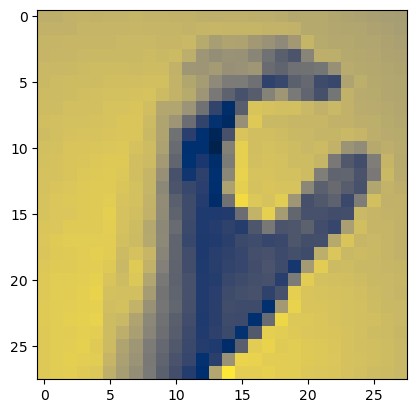

In [23]:
#item for the next blocks
item = 1424

#show the true information about the item in question
plt.figure()
plt.imshow(XT[item],cmap="cividis")#, interpolation="bicubic")
#plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[YT[item]])
plt.show()

Text(0, 0.5, 'Confidence')

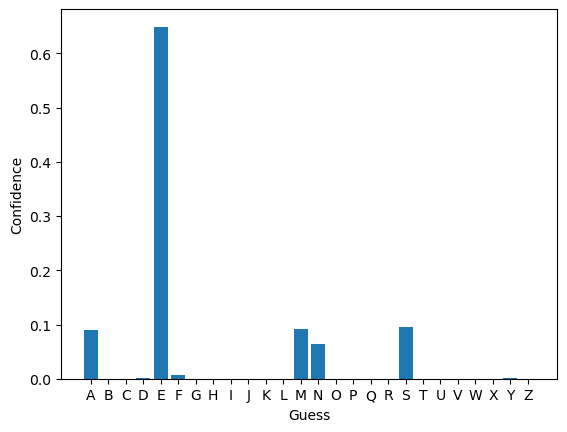

In [141]:
#display guesses and confidences
plt.figure
plt.bar(class_names, predictions[item])
plt.xlabel("Guess")
plt.ylabel("Confidence")
